# 선형회귀 - y = Wx+b꼴
## y=Wx 꼴과는 다르게 편향값이 추가되어, W를 스칼라가 아닌 벡터로 정의한다.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

x와 y를 랜덤으로 정한다.

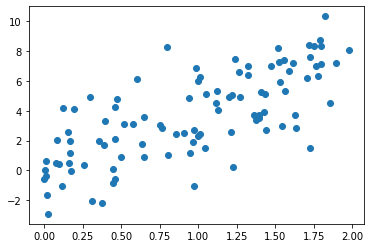

In [2]:
x = 2 * np.random.rand(100, 1)
y_train = 4*x + np.random.randn(100, 1)*2
plt.scatter(x,y_train)
plt.show()

W를 2x1의 랜덤한 벡터로 초기화한다.
이때 W의 0번째 원소는 W의 1번째 원소는 편향이다

In [3]:
W = np.array([[random.random()], [random.random()]])
W.shape

(2, 1)

In [4]:
x

array([[3.75439620e-01],
       [1.01541559e+00],
       [1.08450721e-03],
       [1.63563864e+00],
       [1.54400271e-01],
       [7.54288949e-01],
       [3.12448964e-01],
       [8.00776806e-01],
       [1.04821659e+00],
       [1.71881593e+00],
       [1.00176158e+00],
       [1.56423303e+00],
       [3.56206546e-01],
       [1.32086059e+00],
       [4.47238451e-01],
       [1.79368476e+00],
       [7.79036685e-02],
       [9.73513617e-01],
       [1.51616939e+00],
       [1.70614486e+00],
       [1.39833996e+00],
       [8.67636908e-02],
       [4.72265401e-01],
       [1.65632048e-01],
       [1.80026912e+00],
       [1.62632366e+00],
       [1.97652964e+00],
       [1.75346766e+00],
       [4.61764153e-01],
       [8.53587499e-01],
       [1.59449387e-01],
       [1.23707111e+00],
       [5.77379285e-01],
       [9.85646092e-01],
       [1.78131169e-01],
       [1.69536786e-01],
       [1.55717246e+00],
       [1.21330606e-01],
       [1.85432846e+00],
       [1.01414119e+00],


In [5]:
x.shape

(100, 1)

In [6]:
np.ones(shape=(100,1)).shape

(100, 1)

x를 가중치 W와 행렬곱하기 편하도록 100x2꼴의 행렬로 바꾼다.
이때 편향값은 1과 곱해지므로 concatenate 명령어로 모든 x의 원소를 \[기존원소, 1]로 바꾼다

In [7]:
x_train = np.concatenate((x, np.ones(shape=(100,1))), -1)

In [8]:
x_train

array([[3.75439620e-01, 1.00000000e+00],
       [1.01541559e+00, 1.00000000e+00],
       [1.08450721e-03, 1.00000000e+00],
       [1.63563864e+00, 1.00000000e+00],
       [1.54400271e-01, 1.00000000e+00],
       [7.54288949e-01, 1.00000000e+00],
       [3.12448964e-01, 1.00000000e+00],
       [8.00776806e-01, 1.00000000e+00],
       [1.04821659e+00, 1.00000000e+00],
       [1.71881593e+00, 1.00000000e+00],
       [1.00176158e+00, 1.00000000e+00],
       [1.56423303e+00, 1.00000000e+00],
       [3.56206546e-01, 1.00000000e+00],
       [1.32086059e+00, 1.00000000e+00],
       [4.47238451e-01, 1.00000000e+00],
       [1.79368476e+00, 1.00000000e+00],
       [7.79036685e-02, 1.00000000e+00],
       [9.73513617e-01, 1.00000000e+00],
       [1.51616939e+00, 1.00000000e+00],
       [1.70614486e+00, 1.00000000e+00],
       [1.39833996e+00, 1.00000000e+00],
       [8.67636908e-02, 1.00000000e+00],
       [4.72265401e-01, 1.00000000e+00],
       [1.65632048e-01, 1.00000000e+00],
       [1.800269

In [9]:
y_train

array([[-2.15289313e+00],
       [ 6.24068999e+00],
       [-5.76220322e-01],
       [ 2.86565017e+00],
       [ 2.55157455e+00],
       [ 3.03048848e+00],
       [-2.01594688e+00],
       [ 8.28496322e+00],
       [ 5.12312943e+00],
       [ 8.42020032e+00],
       [ 5.98062300e+00],
       [ 5.34734250e+00],
       [ 1.94933481e+00],
       [ 6.39932317e+00],
       [ 7.75090676e-02],
       [ 8.72880925e+00],
       [ 4.98466220e-01],
       [ 2.72193899e+00],
       [ 8.18872070e+00],
       [ 6.17748283e+00],
       [ 3.68575202e+00],
       [ 2.05308795e+00],
       [ 4.76814290e+00],
       [ 1.17355777e+00],
       [ 8.32676815e+00],
       [ 3.71506446e+00],
       [ 8.04482689e+00],
       [ 8.31003728e+00],
       [ 2.13647027e+00],
       [ 2.42595859e+00],
       [ 4.68195087e-01],
       [ 7.43752076e+00],
       [ 3.13739862e+00],
       [ 6.84378473e+00],
       [-8.99382517e-03],
       [ 1.98544064e+00],
       [ 7.36862835e+00],
       [ 4.19035068e+00],
       [ 4.5

MSE 오차함수를 만들고 오차값을 확인한다

In [10]:
def mse(x, y, W):
    return np.mean((y-x@W)**2)

In [11]:
mse(x_train, y_train, W)

9.735315008715238

In [12]:
(y_train-(x_train@W)).shape

(100, 1)

In [13]:
x_train.T.shape

(2, 100)

오차함수의 W에 대한 그래디언트를 구한다. (미분 과정의 자세한 설명은 물어보면 해줄 것)

In [14]:
def differentiated_mse(x, y, W):
    return (-x.T)@(y-x@W) / len(x)

에포크 1000에 Learning Rate는 0.1로 해서 W를 업데이트 한다.

In [15]:
epoch = 1000
lr = 0.1

for i in range(epoch):
    W -= lr*differentiated_mse(x_train, y_train, W)

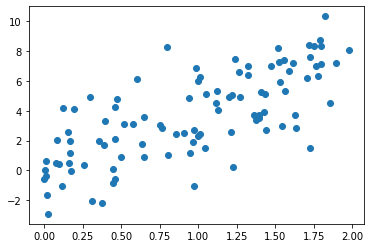

In [16]:
plt.scatter(x, y_train)
plt.show()

그래프를 그려 확인한다.

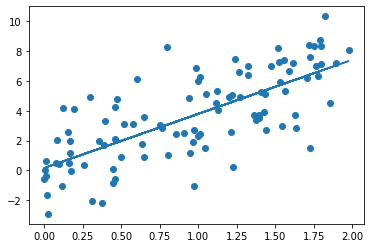

In [17]:
plt.plot(x, x_train@W)
plt.scatter(x, y_train)
plt.show()

W의 값을 확인한다.
이때 W의 0번째 원소는 가중치, 1번째 원소는 편향이다.

In [18]:
W

array([[3.62746901],
       [0.15915295]])